### Análise de dados da empresa Empresta Bem Melhor

#### Carregando base de dados

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importando o arquivo

arquivo = "BaseModelo.xlsx"
df = pd.read_excel(arquivo)

#### Explorando base

In [4]:
# Visualizando as primeiras linhas

print("Primeiras linhas da base")
print()
display(df.head())

Primeiras linhas da base



,ID Proposta,ID Cliente,Fase,Empresa,Situação,Canal,Unidade,Regional,Instituição,Convênio,...,Nome do Segmento,Data Inclusão,Data Digitada,Data Aprovada,Data Paga Cliente,Data Cancelada,Motivo Cancelamento,Submotivo Cancelamento,Digital,Midia
0,138560,14635,Proposta Aprovada,Empresta,Paga Comissionamento,Loja Franquia,FRQ - SALVADOR,REG RN/PE/BA/PE,OLE,Instituto Nacional do Seguro Social,...,NaN,2020-12-05 16:29:00,2022-03-22 10:16:00,2022-03-22 11:21:00,2022-03-30 17:04:00,NaT,NaN,NaN,Sim,NaN
1,349338,4143546,Proposta Cancelada,Empresta,NaN,Televendas,UN - TELEVENDAS,CENTRAL,BMG,SIAPE,...,NaN,2021-01-13 09:34:00,2022-01-20 13:35:00,NaT,NaT,2022-01-21 11:07:00,Proposta cancelada,Redução de margem,Não,NaN
2,417357,3542434,Proposta Aprovada,Empresta,Paga ao cliente,Televendas,UN - TELEVENDAS,CENTRAL,BMG,SIAPE,...,NaN,2021-01-21 08:49:00,2022-01-15 09:03:00,2022-01-18 08:15:00,2022-01-18 08:15:00,NaT,NaN,NaN,Não,NaN
3,417883,4257369,Proposta Aprovada,Empresta,Paga ao cliente,Televendas,UN - TELEVENDAS,CENTRAL,BMG,Instituto Nacional do Seguro Social,...,NaN,2021-01-21 11:39:00,2022-01-14 11:50:00,2022-01-14 16:28:00,2022-01-14 16:28:00,NaT,NaN,NaN,Não,NaN
4,455873,5150362,Proposta Aprovada,Empresta,Paga Comissionamento,Loja Própria,UN - MACEIO BECO,REG AL/PE/PB,PAN,Estado de Alagoas,...,NaN,2021-01-26 16:03:00,2022-03-18 19:22:00,2022-03-19 10:38:00,2022-03-19 15:51:00,NaT,NaN,NaN,Sim,NaN


In [5]:
# Resumo das colunas, tipos de dados e valores nulos

print("Resumo da base:")
print()
display(df.info())

Resumo da base:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102515 entries, 0 to 102514
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   ID Proposta             102515 non-null  int64         
 1   ID Cliente              102515 non-null  int64         
 2   Fase                    102515 non-null  object        
 3   Empresa                 102515 non-null  object        
 4   Situação                67183 non-null   object        
 5   Canal                   102515 non-null  object        
 6   Unidade                 102515 non-null  object        
 7   Regional                102515 non-null  object        
 8   Instituição             102469 non-null  object        
 9   Convênio                102469 non-null  object        
 10  Serviços                102469 non-null  object        
 11  Valor Liberado          93255 non-null   float64       
 12  Quantidade Pa

None

In [6]:
# Contagem de valores nulos por coluna

print("Valores nulos por coluna:")
print()
display(df.isnull().sum())

Valores nulos por coluna:



ID Proposta                    0
ID Cliente                     0
Fase                           0
Empresa                        0
Situação                   35332
Canal                          0
Unidade                        0
Regional                       0
Instituição                   46
Convênio                      46
Serviços                      46
Valor Liberado              9260
Quantidade Parcelas        14918
Receita                      888
Tabela                      8078
Tag Origem                  9892
Nome do Segmento            1751
Data Inclusão                  0
Data Digitada                  0
Data Aprovada              13200
Data Paga Cliente          35446
Data Cancelada             84215
Motivo Cancelamento        84338
Submotivo Cancelamento     84338
Digital                        0
Midia                     102504
dtype: int64

In [7]:
# Percentual de valores nulos por coluna

print("Percentual de valores nulos por coluna:")
print()
percentual_nulo = (df.isnull().sum() / len(df)) * 100
display(percentual_nulo.sort_values(ascending = False))

Percentual de valores nulos por coluna:



Midia                     99.989270
Submotivo Cancelamento    82.268936
Motivo Cancelamento       82.268936
Data Cancelada            82.148954
Data Paga Cliente         34.576403
Situação                  34.465200
Quantidade Parcelas       14.552017
Data Aprovada             12.876164
Tag Origem                 9.649320
Valor Liberado             9.032824
Tabela                     7.879822
Nome do Segmento           1.708043
Receita                    0.866215
Serviços                   0.044871
Convênio                   0.044871
Instituição                0.044871
ID Cliente                 0.000000
Data Inclusão              0.000000
Data Digitada              0.000000
Regional                   0.000000
Unidade                    0.000000
Canal                      0.000000
Empresa                    0.000000
Fase                       0.000000
Digital                    0.000000
ID Proposta                0.000000
dtype: float64

#### Iniciando o tratamento de dados

In [8]:
# Exclusão de colunas com alta quantidade de nulos e/ou pouca relevância

colunas_a_excluir = ['Quantidade Parcelas', 'Motivo Cancelamento', 'Submotivo Cancelamento', 'Midia']
df = df.drop(columns = colunas_a_excluir)

In [9]:
# Preenchimento da coluna "Situação" com base na coluna "Fase"

def preencher_situacao(row):
    if row['Fase'] == "Proposta Cancelada":
        return 'Proposta Cancelada pelo Banco ou pelo Cliente'
    elif row['Fase'] == 'Proposta Aprovada' and pd.isnull(row['Situação']):
        return 'Proposta enviada para Esteira Antifraude'
    elif row['Fase'] == 'Proposta em Negociação':
        return 'Proposta com os canais de vendas'
    elif row['Fase'] == 'Proposta em Processamento':
        return 'Proposta em análise pela Esteira Antifraude'
    else:
        return row['Situação']  # Mantém o valor original, se houver

In [10]:
# Aplicando a função à coluna "Situação"

df['Situação'] = df.apply(preencher_situacao, axis = 1)

In [11]:
# Tratamento da coluna "Instituição"

def preencher_instituicao(row):
    if row['Fase'] == 'Proposta Cancelada':
        return 'Proposta não enviada para os bancos'
    elif row['Fase'] == 'Proposta em Processamento':
        return 'Proposta em análise pela Esteira Antifraude'
    else:
        return row['Instituição'] # Mantém o valor original, se houver

In [12]:
# Aplicando a função à coluna "Instituição"

df['Instituição'] = df.apply(preencher_instituicao, axis = 1)

In [13]:
# Tratamento da coluna "Convênio"

def preencher_convenio(row):
    if row['Fase'] == 'Proposta Cancelada':
        return 'Não houve avanço'
    elif row['Fase'] == 'Proposta em Processamento':
        return 'Em análise pela Esteira Antifraude'
    else:
        return row['Convênio'] # Mantém o valor original, se houver

In [14]:
# Aplicando a função à coluna "Convênio"

df['Convênio'] = df.apply(preencher_convenio, axis = 1)

In [15]:
# Tratamento da coluna "Serviços"

def preencher_servicos(row):
    if row['Fase'] == 'Proposta Cancelada':
        return 'Serviço cancelado pela Esteira Antifraude'
    elif row['Fase'] == 'Proposta em Processamento':
        return 'Aguardando o fim do Processamento da Proposta'
    else:
        return row['Serviços'] # Mantém o valor original, se houver

In [16]:
# Aplicando a função à coluna "Serviço"

df['Serviços'] = df.apply(preencher_servicos, axis = 1)

In [17]:
# Tratamento da coluna "Tabela"

def preencher_tabela(row):
    if row['Fase'] == 'Proposta Cancelada':
        return 'NÃO POSSUI TABELA POR PROPOSTA CANCELADA'
    elif row['Fase'] == 'Proposta Aprovada':
        return 'AGUARDANDO TABELA POR PARTE DA INSTITUIÇÃO'
    elif row['Fase'] == 'Proposta em Processamento':
        return 'AGUARDANDO FIM DO PROCESSAMENTO'
    else:
        return row['Tabela'] # Mantém o valor original, se houver

In [18]:
# Aplicando a função à coluna "Tabela"

df['Tabela'] = df.apply(preencher_tabela, axis = 1)

In [19]:
# Preenchendo os valores nulos da coluna "Tag Origem"

df['Tag Origem'] = df['Tag Origem'].fillna('Origem Não Identificada')

In [20]:
# Tratamento da coluna "Nome Segmento"

def preencher_nome_segmento(row):
    if pd.isnull(row['Nome do Segmento']):
        return f"Novo - {row['Unidade']}"
    else:
        return row['Nome do Segmento']  # Mantém o valor original, se houver

In [21]:
# Aplicando a função à coluna "Nome do Segmento"

df['Nome do Segmento'] = df.apply(preencher_nome_segmento, axis = 1)

In [22]:
# Conferindo valores nulos nas colunas tratadas

print("Valores nulos após o ajuste:")
print()
display(df[['Situação', 'Instituição', 'Convênio', 'Serviços', 'Tabela', 'Tag Origem', 'Nome do Segmento']].isnull().sum())

Valores nulos após o ajuste:



Situação            0
Instituição         0
Convênio            0
Serviços            0
Tabela              0
Tag Origem          0
Nome do Segmento    0
dtype: int64

In [23]:
# Removendo o símbolo "R$" das colunas "Valor Liberado" e "Receita" e convertendo para numérico

df['Valor Liberado'] = df['Valor Liberado'].astype(str).replace({'R\$': ''}, regex = True).str.replace(',', '').replace('nan', '0').astype(float)
df['Receita'] = df['Receita'].astype(str).replace({'R\$': ''}, regex = True).str.replace(',', '').replace('nan', '0').astype(float)

In [24]:
# Conferindo os tipos de dados após o tratamento

print(df[['Valor Liberado', 'Receita']].dtypes)

Valor Liberado    float64
Receita           float64
dtype: object


In [25]:
# Separação das datas e horas para as colunas de datas

colunas_datas = ['Data Inclusão', 'Data Digitada', 'Data Aprovada', 'Data Paga Cliente', 'Data Cancelada']

for coluna in colunas_datas:
    nova_coluna_hora = f'Hora da {coluna.split()[1]}'  # Nome da nova coluna de horas
    
    # Converte para string para permitir a separação
    
    df[nova_coluna_hora] = df[coluna].astype(str).apply(lambda x: x.split(' ')[1] if ' ' in x else None)
    df[coluna] = df[coluna].astype(str).apply(lambda x: x.split(' ')[0] if ' ' in x else None)

In [26]:
# Exibindo as primeiras linhas para verificar o resultado

display(df[[*colunas_datas, *[f'Hora da {col.split()[1]}' for col in colunas_datas]]].head())

,Data Inclusão,Data Digitada,Data Aprovada,Data Paga Cliente,Data Cancelada,Hora da Inclusão,Hora da Digitada,Hora da Aprovada,Hora da Paga,Hora da Cancelada
0,2020-12-05,2022-03-22,2022-03-22,2022-03-30,None,16:29:00,10:16:00,11:21:00,17:04:00,None
1,2021-01-13,2022-01-20,None,None,2022-01-21,09:34:00,13:35:00,None,None,11:07:00
2,2021-01-21,2022-01-15,2022-01-18,2022-01-18,None,08:49:00,09:03:00,08:15:00,08:15:00,None
3,2021-01-21,2022-01-14,2022-01-14,2022-01-14,None,11:39:00,11:50:00,16:28:00,16:28:00,None
4,2021-01-26,2022-03-18,2022-03-19,2022-03-19,None,16:03:00,19:22:00,10:38:00,15:51:00,None


In [27]:
# Ajustando o formato das datas para "dd/mm/aaaa"

for coluna in ['Data Inclusão', 'Data Digitada', 'Data Aprovada', 'Data Paga Cliente', 'Data Cancelada']:
    df[coluna] = pd.to_datetime(df[coluna], errors = 'coerce').dt.strftime('%d/%m/%Y')

In [28]:
# Exibindo as primeiras linhas para verificar o resultado

display(df[['Data Inclusão', 'Data Digitada', 'Data Aprovada', 'Data Paga Cliente', 'Data Cancelada']].head())

,Data Inclusão,Data Digitada,Data Aprovada,Data Paga Cliente,Data Cancelada
0,05/12/2020,22/03/2022,22/03/2022,30/03/2022,NaN
1,13/01/2021,20/01/2022,NaN,NaN,21/01/2022
2,21/01/2021,15/01/2022,18/01/2022,18/01/2022,NaN
3,21/01/2021,14/01/2022,14/01/2022,14/01/2022,NaN
4,26/01/2021,18/03/2022,19/03/2022,19/03/2022,NaN


In [29]:
# Removendo valores nas colunas "Data Aprovada" e "Data Paga Cliente" para "Proposta Cancelada" e "Proposta em Processamento"

df.loc[df['Fase'].isin(['Proposta Cancelada', 'Proposta em Processamento']), ['Data Aprovada', 'Data Paga Cliente']] = None

In [30]:
# Confirmando alterações

print("Verificação de 'Data Aprovada' e 'Data Paga Cliente' para 'Proposta Cancelada' e 'Proposta em Processamento':")
print()
display(df[df['Fase'].isin(['Proposta Cancelada', 'Proposta em Processamento'])][['Fase', 'Data Aprovada', 'Data Paga Cliente']].head())

Verificação de 'Data Aprovada' e 'Data Paga Cliente' para 'Proposta Cancelada' e 'Proposta em Processamento':



,Fase,Data Aprovada,Data Paga Cliente
1,Proposta Cancelada,None,None
9,Proposta Cancelada,None,None
10,Proposta Cancelada,None,None
15,Proposta Cancelada,None,None
45,Proposta Cancelada,None,None


In [31]:
# Verificando as colunas com valores nulos e seus respectivos totais após todo tratamento realizado

print("Colunas com valores nulos e seus respectivos totais:")
print()
valores_nulos = df.isnull().sum()
display(valores_nulos[valores_nulos > 0])

Colunas com valores nulos e seus respectivos totais:



Data Aprovada        18890
Data Paga Cliente    35565
Data Cancelada       84215
Hora da Aprovada     13200
Hora da Paga         35446
Hora da Cancelada    84215
dtype: int64

In [32]:
# Definindo os serviços que não devem gerar receita

servicos_sem_receita = [
    "Aguardando o fim do Processamento da Proposta",
    "Nova Conta",
    "Novo",
    "Novo Cartao",
    "Novo Cartao-Saque",
    "Novo Cartao-Saque-Seguro",
    "Novo Cartao-Seguro",
    "Portabilidade",
    "Serviço cancelado pela Esteira Antifraude",
    "Transferência de Conta"
]

In [33]:
# Limpando os valores na coluna "Receita" para os serviços especificados

df.loc[df['Serviços'].isin(servicos_sem_receita), 'Receita'] = None

In [34]:
# Condições específicas para "Novo FGTS"

novo_fgts_aprovada = (
    (df['Serviços'] == "Novo FGTS") & 
    (df['Fase'] == "Proposta Aprovada") & 
    (df['Valor Liberado'] > 50)
)

novo_fgts_negociacao = (
    (df['Serviços'] == "Novo FGTS") & 
    (df['Fase'] == "Proposta em Negociação")
)

In [35]:
# Atualizando a receita para "Novo FGTS" com fase "Proposta Aprovada"

df.loc[novo_fgts_aprovada, 'Receita'] = df.loc[novo_fgts_aprovada, 'Valor Liberado'] * 0.0129

In [36]:
# Limpando os valores de "Valor Liberado" e "Receita" para "Novo FGTS" com fase "Proposta em Negociação"

df.loc[novo_fgts_negociacao, ['Valor Liberado', 'Receita']] = None

In [37]:
# Condição para "Refinanciamento" com cobrança de 0,99%

refinanciamento_aprovada = (
    (df['Serviços'] == "Refinanciamento") & 
    (df['Fase'] == "Proposta Aprovada")
)

In [38]:
# Atualizando a receita para "Refinanciamento"

df.loc[refinanciamento_aprovada, 'Receita'] = df.loc[refinanciamento_aprovada, 'Valor Liberado'] * 0.0099

In [39]:
# Verificando os ajustes

print("Verificação de ajustes para serviços específicos:")
print()
display(
    df[
        (df['Serviços'] == "Novo FGTS") | 
        (df['Serviços'] == "Refinanciamento") | 
        (df['Serviços'].isin(servicos_sem_receita))
    ][['Serviços', 'Fase', 'Valor Liberado', 'Receita']].head(20)
)

Verificação de ajustes para serviços específicos:



,Serviços,Fase,Valor Liberado,Receita
0,Novo,Proposta Aprovada,1461.16,NaN
1,Serviço cancelado pela Esteira Antifraude,Proposta Cancelada,2197.08,NaN
4,Refinanciamento,Proposta Aprovada,2256.20,22.336380
5,Refinanciamento,Proposta Aprovada,1500.26,14.852574
9,Serviço cancelado pela Esteira Antifraude,Proposta Cancelada,1470.48,NaN
10,Serviço cancelado pela Esteira Antifraude,Proposta Cancelada,1500.00,NaN
11,Novo,Proposta Aprovada,2350.55,NaN
12,Novo,Proposta Aprovada,1466.72,NaN
13,Novo,Proposta Aprovada,1462.86,NaN
15,Serviço cancelado pela Esteira Antifraude,Proposta Cancelada,9324.00,NaN


In [40]:
# Tratamento da coluna 'Condição'

def atualizar_condicao(row):
    # Serviços que não geram receita
    servicos_sem_receita = [
        "Aguardando o fim do Processamento da Proposta",
        "Nova Conta",
        "Novo",
        "Novo Cartao",
        "Novo Cartao-Saque",
        "Novo Cartao-Saque-Seguro",
        "Novo Cartao-Seguro",
        "Portabilidade",
        "Serviço cancelado pela Esteira Antifraude",
        "Transferência de Conta"
    ]
    
    if row['Fase'] == 'Proposta Aprovada':
        if row['Serviços'] in servicos_sem_receita:
            return "Não houve repasse do Banco e não gera Receita"
        return 'Pago ao Cliente'
    elif row['Fase'] == 'Proposta Cancelada':
        return 'Não houve repasse do Banco e não gera Receita'
    elif row['Fase'] == 'Proposta em Negociação':
        return 'Em análise pelo canal de Vendas'
    elif row['Fase'] == 'Proposta em Processamento':
        return 'Em análise pela Esteira Antifraude'
    else:
        return 'Indeterminado'

In [41]:
# Aplicando a lógica

df['Condição'] = df.apply(atualizar_condicao, axis=1)

In [42]:
# Verificando a distribuição

distribuicao = df['Condição'].value_counts()
print("Distribuição da coluna 'Condição':")
print()
display(distribuicao)

Distribuição da coluna 'Condição':



Condição
Não houve repasse do Banco e não gera Receita    56774
Pago ao Cliente                                  45008
Em análise pela Esteira Antifraude                 732
Em análise pelo canal de Vendas                      1
Name: count, dtype: int64

In [43]:
# Criando o mapeamento de unidades para Estados

mapeamento_unidades = {
    'E-COMMERCE': 'MG',
    'FRQ - W2P FGTS EMPRESTA': 'MG',
    'FRQ - ALFENAS': 'MG',
    'FRQ - ALIPIO MELO': 'MG',
    'FRQ - ARAGUARI': 'MG',
    'FRQ - ARAGUARI II': 'MG',
    'FRQ - BARBACENA': 'MG',
    'FRQ - BARREIRO': 'MG',
    'FRQ - BELEM': 'PA',
    'FRQ - BH BETANIA': 'MG',
    'FRQ - BH CEU AZUL': 'MG',
    'FRQ - BH CURITIBA': 'MG',
    'FRQ - BH PADRE EUSTAQUIO': 'MG',
    'FRQ - BH PRACA SETE': 'MG',
    'FRQ - BOM DESPACHO': 'MG',
    'FRQ - CARATINGA': 'MG',
    'FRQ - CATALAO': 'GO',
    'FRQ - CONGONHAS': 'MG',
    'FRQ - CONSELHEIRO LAFAIETE': 'MG',
    'FRQ - CURVELO': 'MG',
    'FRQ - DIVINOPOLIS': 'MG',
    'FRQ - DIVINOPOLIS II': 'MG',
    'FRQ - FRANCA': 'SP',
    'FRQ - GOVERNADOR VALADARES': 'MG',
    'FRQ - GRAJAU': 'MA',
    'FRQ - INDUSTRIAL': 'MG',
    'FRQ - ITABIRA': 'MG',
    'FRQ - ITABIRA II': 'MG',
    'FRQ - ITABIRITO': 'MG',
    'FRQ - ITAJUBA': 'MG',
    'FRQ - ITAJUBA II': 'MG',
    'FRQ - ITAUNA': 'MG',
    'FRQ - ITUIUTABA': 'MG',
    'FRQ - JOAO PESSOA PB': 'PB',
    'FRQ - JUIZ DE FORA': 'MG',
    'FRQ - JUSTINOPOLIS': 'MG',
    'FRQ - LAGES': 'SC',
    'FRQ - MARIANA': 'MG',
    'FRQ - MOSSORO': 'RN',
    'FRQ - NATAL': 'RN',
    'FRQ - NOVA SERRANA': 'MG',
    'FRQ - PARA DE MINAS': 'MG',
    'FRQ - PARNAMIRIM': 'RN',
    'FRQ - PIRAPORA': 'MG',
    'FRQ - POUSO ALEGRE': 'MG',
    'FRQ - RECIFE': 'PE',
    'FRQ - RIBEIRAO NEVES': 'MG',
    'FRQ - RIO BONITO': 'RJ',
    'FRQ - SALVADOR': 'BA',
    'FRQ - SALVADOR II': 'BA',
    'FRQ - SALVADOR III': 'BA',
    'FRQ - SANTA ROSA': 'RS',
    'FRQ - SANTO AMARO': 'BA',
    'FRQ - SAO JOAO DEL REI': 'MG',
    'FRQ - SAO JOSE DOS CAMPOS': 'SP',
    'FRQ - SETE LAGOAS': 'MG',
    'FRQ - TIMOTEO': 'MG',
    'FRQ - TRES CORACOES': 'MG',
    'FRQ - TRES PONTAS': 'MG',
    'FRQ - TRES PONTAS II': 'MG',
    'FRQ - TUPINAMBAS': 'MG',
    'FRQ - UBERABA': 'MG',
    'FRQ - UBERLANDIA': 'MG',
    'FRQ - VARGINHA': 'MG',
    'FRQ - VENDA NOVA': 'MG',
    'FRQ - VITORIA DA CONQUISTA': 'BA',
    'UN - ARACAJU': 'SE',
    'UN - ARACAJU VALADAO': 'SE',
    'UN - ARAPIRACA': 'AL',
    'UN - BARBACENA': 'MG',
    'UN - BELO HORIZONTE': 'MG',
    'UN - BETIM': 'MG',
    'UN - BETIM II': 'MG',
    'UN - BH AMAZONAS': 'MG',
    'UN - CAMPINA GRANDE': 'PB',
    'UN - CARUARU': 'PE',
    'UN - CATALAO MB': 'GO',
    'UN - CONTAGEM': 'MG',
    'UN - CORONEL FABRICIANO': 'MG',
    'UN - GARANHUNS': 'PE',
    'UN - IPATINGA': 'MG',
    'UN - ITABIRA': 'MG',
    'UN - JOAO MONLEVADE': 'MG',
    'UN - JOAO PESSOA': 'PB',
    'UN - JUIZ DE FORA': 'MG',
    'UN - JUIZ DE FORA GV': 'MG',
    'UN - MACEIO BECO': 'AL',
    'UN - MACEIO BOA VISTA': 'AL',
    'UN - MACEIO SOL': 'AL',
    'UN - MONTES CLAROS': 'MG',
    'UN - MURIAE': 'MG',
    'UN - PATOS DE MINAS': 'MG',
    'UN - PATOS DE MINAS II': 'MG',
    'UN - RECIFE BOA VISTA': 'PE',
    'UN - RECIFE IMPERADOR': 'PE',
    'UN - SANTA LUZIA': 'MG',
    'UN - TAGUATINGA': 'DF',
    'UN - TELEVENDAS': 'MG',
    'UN - UBA': 'MG',
    'UN - UBERABA': 'MG',
    'UN - UBERLANDIA': 'MG',
}

In [44]:
# Aplicando o mapeamento

df['Estado'] = df['Unidade'].apply(lambda unidade: mapeamento_unidades.get(unidade, 'Estado Não Identificado'))

# Verificando o resultado

display(df[['Unidade', 'Estado']].drop_duplicates().sort_values(by='Unidade'))

,Unidade,Estado
1744,E-COMMERCE,MG
385,FRQ - ALFENAS,MG
498,FRQ - ALIPIO MELO,MG
128,FRQ - ARAGUARI,MG
258,FRQ - ARAGUARI II,MG
...,...,...
90,UN - TAGUATINGA,DF
1,UN - TELEVENDAS,MG
159,UN - UBA,MG
26,UN - UBERABA,MG


In [45]:
# Tratamento da coluna Estado

def mapear_estado(unidade):
    return mapeamento_unidades.get(unidade, 'Estado Não Identificado')

In [46]:
# Aplicando a lógica para criar a coluna "Estado"

df['Estado'] = df['Unidade'].apply(mapear_estado)

In [47]:
# Verificando o resultado

display(df[['Unidade', 'Estado']].drop_duplicates().sort_values(by = 'Unidade'))

,Unidade,Estado
1744,E-COMMERCE,MG
385,FRQ - ALFENAS,MG
498,FRQ - ALIPIO MELO,MG
128,FRQ - ARAGUARI,MG
258,FRQ - ARAGUARI II,MG
...,...,...
90,UN - TAGUATINGA,DF
1,UN - TELEVENDAS,MG
159,UN - UBA,MG
26,UN - UBERABA,MG


In [48]:
# Tratamento da coluna "Perfil"

def definir_perfil_cliente(convenio):
    if convenio in [
        "Forças Armadas", "Prefeitura de Aracaju", "Prefeitura de Belo Horizonte",
        "Prefeitura de Betim", "Prefeitura de Contagem", "Prefeitura de Jaboatão dos Guararapes",
        "Prefeitura de Juiz de Fora", "Prefeitura de Ribeirão das Neves", "Prefeitura de Salvador",
        "Prefeitura de São Paulo", "Prefeitura de Uberaba", "Prefeitura de Uberlândia",
        "Prefeitura Nova Serrana", "SEPLAG", "SIAPE", "Gov do Estado do Rio de Janeiro",
        "Governo do Maranhão"
    ]:
        return "Funcionário Público"
    elif convenio == "Fundo de Garantia do Tempo de Serviço":
        return "Trabalhador Formal"
    elif convenio == "Instituto Nacional do Seguro Social":
        return "Aposentado/Pensionista"
    else:
        return "Cliente Normal"

In [49]:
# Aplicando a lógica e criando a nova coluna

df['Perfil do Cliente'] = df['Convênio'].apply(definir_perfil_cliente)

In [50]:
# Exibindo as primeiras linhas para verificar

print("Primeiras linhas do DataFrame com 'Perfil do Cliente':")
print()
display(df[['Convênio', 'Perfil do Cliente']].head())

Primeiras linhas do DataFrame com 'Perfil do Cliente':



,Convênio,Perfil do Cliente
0,Instituto Nacional do Seguro Social,Aposentado/Pensionista
1,Não houve avanço,Cliente Normal
2,SIAPE,Funcionário Público
3,Instituto Nacional do Seguro Social,Aposentado/Pensionista
4,Estado de Alagoas,Cliente Normal


In [51]:
# Exibindo as primeiras linhas do DataFrame após todo tratamento

print("Primeiras linhas do DataFrame:")
print()
display(df.head())

Primeiras linhas do DataFrame:



,ID Proposta,ID Cliente,Fase,Empresa,Situação,Canal,Unidade,Regional,Instituição,Convênio,...,Data Cancelada,Digital,Hora da Inclusão,Hora da Digitada,Hora da Aprovada,Hora da Paga,Hora da Cancelada,Condição,Estado,Perfil do Cliente
0,138560,14635,Proposta Aprovada,Empresta,Paga Comissionamento,Loja Franquia,FRQ - SALVADOR,REG RN/PE/BA/PE,OLE,Instituto Nacional do Seguro Social,...,NaN,Sim,16:29:00,10:16:00,11:21:00,17:04:00,None,Não houve repasse do Banco e não gera Receita,BA,Aposentado/Pensionista
1,349338,4143546,Proposta Cancelada,Empresta,Proposta Cancelada pelo Banco ou pelo Cliente,Televendas,UN - TELEVENDAS,CENTRAL,Proposta não enviada para os bancos,Não houve avanço,...,21/01/2022,Não,09:34:00,13:35:00,None,None,11:07:00,Não houve repasse do Banco e não gera Receita,MG,Cliente Normal
2,417357,3542434,Proposta Aprovada,Empresta,Paga ao cliente,Televendas,UN - TELEVENDAS,CENTRAL,BMG,SIAPE,...,NaN,Não,08:49:00,09:03:00,08:15:00,08:15:00,None,Pago ao Cliente,MG,Funcionário Público
3,417883,4257369,Proposta Aprovada,Empresta,Paga ao cliente,Televendas,UN - TELEVENDAS,CENTRAL,BMG,Instituto Nacional do Seguro Social,...,NaN,Não,11:39:00,11:50:00,16:28:00,16:28:00,None,Pago ao Cliente,MG,Aposentado/Pensionista
4,455873,5150362,Proposta Aprovada,Empresta,Paga Comissionamento,Loja Própria,UN - MACEIO BECO,REG AL/PE/PB,PAN,Estado de Alagoas,...,NaN,Sim,16:03:00,19:22:00,10:38:00,15:51:00,None,Pago ao Cliente,AL,Cliente Normal


#### Iniciando o análise de dados

In [52]:
# Quantidade de clientes únicos

quantidade_de_clientes = df['ID Cliente'].nunique()
print(f"Quantidade de clientes únicos: {quantidade_de_clientes}")

Quantidade de clientes únicos: 68916


In [53]:
# Estatística descritiva da coluna 'Receita'

print("Estatística descritiva da coluna 'Receita':")
print()
display(df['Receita'].describe())

Estatística descritiva da coluna 'Receita':



count    45008.000000
mean        37.720329
std        121.328241
min          0.000000
25%          5.283034
50%         12.012163
75%         30.601219
max       6067.117647
Name: Receita, dtype: float64

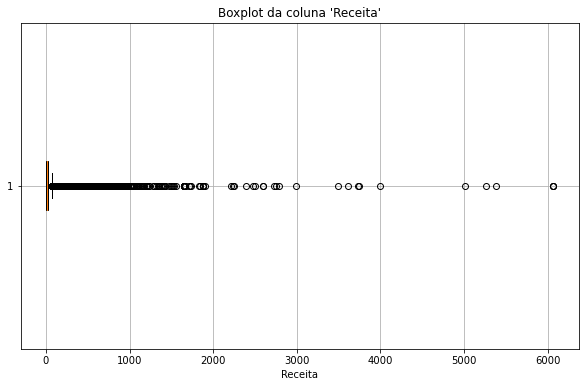

In [54]:
# Visualização com boxplot

plt.figure(figsize = (10,6))
plt.boxplot(df['Receita'].dropna(), vert = False, patch_artist = True, boxprops = dict(facecolor = "lightblue"))
plt.title("Boxplot da coluna 'Receita'")
plt.xlabel("Receita")
plt.grid(True)
plt.show()

In [55]:
# Cálculo dos limites para identificar outliers

q1 = df['Receita'].quantile(0.25)
q3 = df['Receita'].quantile(0.75)
iqr = q3 - q1
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [56]:
print(f"Limite inferior: {limite_inferior:.2f}")
print()
print(f"Limite superior: {limite_superior:.2f}")

Limite inferior: -32.69

Limite superior: 68.58


In [57]:
# Identificando outliers

outliers = df[(df['Receita'] < limite_inferior) | (df['Receita'] > limite_superior)]

In [58]:
print("Quantidade de outliers identificados:", outliers.shape[0])
print()
print("Amostra dos outliers identificados:")
display(outliers[['ID Cliente', 'Fase', 'Situação', 'Receita', 'Serviços', 'Estado']].head())

Quantidade de outliers identificados: 5901

Amostra dos outliers identificados:


,ID Cliente,Fase,Situação,Receita,Serviços,Estado
2,3542434,Proposta Aprovada,Paga ao cliente,699.62,Saque,MG
3,4257369,Proposta Aprovada,Paga ao cliente,135.52,Saque,MG
8,3813947,Proposta Aprovada,Paga ao cliente,105.63,Saque,MG
14,3722126,Proposta Aprovada,Paga ao cliente,84.37,Saque,MG
16,3962554,Proposta Aprovada,Paga ao cliente,147.81,Saque,MG


In [59]:
# Lista de serviços que não geram receita

servicos_sem_receita = [
    "Aguardando o fim do Processamento da Proposta",
    "Nova Conta",
    "Novo",
    "Novo Cartao",
    "Novo Cartao-Saque",
    "Novo Cartao-Saque-Seguro",
    "Novo Cartao-Seguro",
    "Portabilidade",
    "Serviço cancelado pela Esteira Antifraude",
    "Transferência de Conta"
]

In [60]:
# Aplicando o cálculo ajustado para o percentual 'Receita'

df['Percentual Receita'] = None # Iniciando a coluna

df.loc[
    (~df['Serviços'].isin(servicos_sem_receita)) &
    (df['Valor Liberado'] > 0) &
    (df['Receita'] > 0),
    'Percentual Receita'
] = (df['Receita'] / df['Valor Liberado']) * 100

In [61]:
# Visualizando resultado

print("Amostra do cálculo de Percentual Receita:")
print()
display(df[['ID Cliente', 'Serviços', 'Valor Liberado', 'Receita', 'Percentual Receita']].head(10))

Amostra do cálculo de Percentual Receita:



,ID Cliente,Serviços,Valor Liberado,Receita,Percentual Receita
0,14635,Novo,1461.16,NaN,None
1,4143546,Serviço cancelado pela Esteira Antifraude,2197.08,NaN,None
2,3542434,Saque,4664.10,699.620000,15.000107
3,4257369,Saque,1232.00,135.520000,11.0
4,5150362,Refinanciamento,2256.20,22.336380,0.99
5,5150362,Refinanciamento,1500.26,14.852574,0.99
6,3319762,Saque,528.95,58.180000,10.999149
7,4038508,Saque,605.16,66.570000,11.000397
8,3813947,Saque,960.28,105.630000,10.999917
9,5338855,Serviço cancelado pela Esteira Antifraude,1470.48,NaN,None


In [62]:
# Filtrando os casos em que a 'Receita' é maior que o 'Valor Liberado'

receita_maior_valor = df[df['Receita'] > df['Valor Liberado']]

In [63]:
# Exibindo a quantidade de casos encontrados

print(f"Quantidade de casos onde Receita é maior que Valor Liberado: {receita_maior_valor.shape[0]}")

Quantidade de casos onde Receita é maior que Valor Liberado: 9


In [64]:
# Amostra dos casos encontrados

print("Amostra dos casos onde Receita é maior que Valor Liberado:")
print()
display(receita_maior_valor[['ID Cliente', 'Fase', 'Situação', 'Instituição', 'Serviços', 'Valor Liberado', 'Receita', 'Percentual Receita', 'Estado']].head(9))

Amostra dos casos onde Receita é maior que Valor Liberado:



,ID Cliente,Fase,Situação,Instituição,Serviços,Valor Liberado,Receita,Percentual Receita,Estado
54996,7417739,Proposta Aprovada,Paga Comissionamento,OLE,Refinanciamento da Portabilidade,508.57,1149.3500,225.996421,MG
63283,7442501,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,155.3220,None,MG
64020,7443093,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,29.2932,None,MG
64756,7443480,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,95.1936,None,MG
64776,7443507,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,27.9840,None,MG
65757,7429475,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,30.3696,None,MG
65760,6966504,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,135.9384,None,MG
91981,4694673,Proposta Aprovada,Proposta enviada para Esteira Antifraude,OLE,Refinanciamento da Portabilidade,155.48,180.7000,116.220736,MG
99241,6053748,Proposta Aprovada,Proposta enviada para Esteira Antifraude,PAN,Refinanciamento da Portabilidade,853.23,936.9750,109.815056,MG


In [65]:
# Criando a flag para inconsistências

df['Flag Inconsistencia'] = (df['Receita'] > df['Valor Liberado']).astype(int)

In [66]:
# Visualizando os casos com inconsistências

inconsistencias = df[df['Flag Inconsistencia'] == 1]
print(f"Total de inconsistências: {inconsistencias.shape[0]}")

Total de inconsistências: 9


In [67]:
# Amostra dos casos inconsistentes

display(inconsistencias[['ID Cliente', 'Fase', 'Situação', 'Instituição', 'Serviços', 'Valor Liberado', 'Receita', 'Percentual Receita', 'Estado']].head(10))

,ID Cliente,Fase,Situação,Instituição,Serviços,Valor Liberado,Receita,Percentual Receita,Estado
54996,7417739,Proposta Aprovada,Paga Comissionamento,OLE,Refinanciamento da Portabilidade,508.57,1149.3500,225.996421,MG
63283,7442501,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,155.3220,None,MG
64020,7443093,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,29.2932,None,MG
64756,7443480,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,95.1936,None,MG
64776,7443507,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,27.9840,None,MG
65757,7429475,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,30.3696,None,MG
65760,6966504,Proposta Aprovada,Paga ao cliente,EMPRESTA,Novo FGTS,0.00,135.9384,None,MG
91981,4694673,Proposta Aprovada,Proposta enviada para Esteira Antifraude,OLE,Refinanciamento da Portabilidade,155.48,180.7000,116.220736,MG
99241,6053748,Proposta Aprovada,Proposta enviada para Esteira Antifraude,PAN,Refinanciamento da Portabilidade,853.23,936.9750,109.815056,MG


In [68]:
# Filtrando os IDs dos clientes com inconsistências

ids_clientes_inconsistentes = receita_maior_valor['ID Cliente'].unique()

In [69]:
# Selecionando todas as propostas desses clientes

propostas_relacionadas = df[df['ID Cliente'].isin(ids_clientes_inconsistentes)]

In [70]:
# Ordenando por cliente e data

propostas_relacionadas = propostas_relacionadas.sort_values(['ID Cliente', 'Data Inclusão'])

In [71]:
# Exibindo amostra das propostas relacionadas

display(propostas_relacionadas[['ID Cliente', 'Fase', 'Situação', 'Serviços', 'Valor Liberado', 'Receita', 'Percentual Receita', 'Estado']].head(20))

,ID Cliente,Fase,Situação,Serviços,Valor Liberado,Receita,Percentual Receita,Estado
52105,4694673,Proposta Aprovada,Paga ao cliente,Refinanciamento,5551.04,54.955296,0.99,MG
52127,4694673,Proposta Aprovada,Proposta enviada para Esteira Antifraude,Refinanciamento,113.33,1.121967,0.99,MG
52135,4694673,Proposta Aprovada,Paga ao cliente,Refinanciamento,922.23,9.130077,0.99,MG
91981,4694673,Proposta Aprovada,Proposta enviada para Esteira Antifraude,Refinanciamento da Portabilidade,155.48,180.700000,116.220736,MG
55272,4694673,Proposta Aprovada,Paga Comissionamento,Novo,988.94,NaN,None,MG
56164,4694673,Proposta Aprovada,Paga Comissionamento,Portabilidade,1342.33,NaN,None,MG
56195,4694673,Proposta Aprovada,Paga Comissionamento,Portabilidade,1169.98,NaN,None,MG
56205,4694673,Proposta Aprovada,Paga Comissionamento,Portabilidade,948.78,NaN,None,MG
60273,4694673,Proposta Aprovada,Paga Comissionamento,Novo,5960.51,NaN,None,MG
64370,4694673,Proposta Aprovada,Paga Comissionamento,Refinanciamento da Portabilidade,833.93,233.542857,28.005091,MG


In [72]:
# Calculando o tempo médio entre propostas para os clientes inconsistentes

propostas_relacionadas['Data Inclusão'] = pd.to_datetime(propostas_relacionadas['Data Inclusão'], dayfirst=True)

In [73]:
# Calculando o tempo médio entre propostas para os clientes inconsistentes

propostas_relacionadas['Tempo Entre Propostas'] = propostas_relacionadas.groupby('ID Cliente')['Data Inclusão'].diff()

In [74]:
# Exibindo a média do tempo entre propostas por cliente

tempo_medio_propostas = propostas_relacionadas.groupby('ID Cliente')['Tempo Entre Propostas'].mean()

In [75]:
# Exibindo o resultado em dias

print("Tempo médio entre propostas (em dias):")
print()
print(tempo_medio_propostas.dt.days)

Tempo médio entre propostas (em dias):

ID Cliente
4694673    1.0
6053748    3.0
6966504    NaN
7417739    8.0
7429475    6.0
7442501    NaN
7443093    NaN
7443480    0.0
7443507    NaN
Name: Tempo Entre Propostas, dtype: float64


In [76]:
# Criando a coluna 'Flag Inconsistências'

propostas_relacionadas['Flag Inconsistências'] = None

In [77]:
# Preenchendo a flag para propostas sem média de dias

propostas_relacionadas.loc[
    propostas_relacionadas['ID Cliente'].isin(tempo_medio_propostas[tempo_medio_propostas.isnull()].index),
    'Flag Inconsistências'
] = 'Cliente desistiu dos serviços'

In [78]:
# Preenchendo a flag para propostas com média de dias

propostas_relacionadas.loc[
    propostas_relacionadas['ID Cliente'].isin(tempo_medio_propostas[tempo_medio_propostas.notnull()].index),
    'Flag Inconsistências'
] = 'Continuou com os serviços'

In [79]:
# Relacionando o 'ID Proposta' para cada caso

propostas_relacionadas = propostas_relacionadas.sort_values(['ID Cliente', 'Data Inclusão'])
propostas_relacionadas['Flag Inconsistências'] = propostas_relacionadas.apply(
    lambda row: f"Proposta {row['ID Proposta']} - {row['Flag Inconsistências']}", axis=1
)

In [80]:
# Exibindo uma amostra com o ID Proposta relacionado

print("Amostra das inconsistências com a flag ajustada:")
print()
display(propostas_relacionadas[['ID Proposta', 'ID Cliente', 'Flag Inconsistências']].head(10))

Amostra das inconsistências com a flag ajustada:



,ID Proposta,ID Cliente,Flag Inconsistências
52105,7381396,4694673,Proposta 7381396 - Continuou com os serviços
52127,7381495,4694673,Proposta 7381495 - Continuou com os serviços
52135,7381523,4694673,Proposta 7381523 - Continuou com os serviços
55272,7403289,4694673,Proposta 7403289 - Continuou com os serviços
56164,7407923,4694673,Proposta 7407923 - Continuou com os serviços
56195,7408066,4694673,Proposta 7408066 - Continuou com os serviços
56205,7408101,4694673,Proposta 7408101 - Continuou com os serviços
60273,7427109,4694673,Proposta 7427109 - Continuou com os serviços
64370,7441155,4694673,Proposta 7441155 - Continuou com os serviços
70234,7458709,4694673,Proposta 7458709 - Continuou com os serviços


In [81]:
# Filtrando apenas as propostas aprovadas com data válida

propostas_aprovadas = df[df['Data Aprovada'].notnull()]

In [82]:
# Agrupando os dados por estado e somando a receita para propostas aprovadas

receita_por_estado_aprovadas = propostas_aprovadas.groupby('Estado')['Receita'].sum().sort_values(ascending=False)

In [83]:
# Formatando os valores em reais

receita_por_estado_formatada_aprovadas = receita_por_estado_aprovadas.apply(
    lambda x: f"R$ {x:,.2f}".replace(",", ".").replace(".", ",", 1)
)

In [84]:
print("Receita total por Estado para propostas aprovadas:")
print()
display(receita_por_estado_formatada_aprovadas)

Receita total por Estado para propostas aprovadas:



Estado
MG    R$ 1,198.187.13
BA      R$ 141,439.18
PE       R$ 94,489.76
AL       R$ 73,960.99
PB       R$ 37,366.30
GO       R$ 30,372.10
SE       R$ 28,704.11
DF       R$ 19,706.00
MA       R$ 18,886.46
RN       R$ 15,802.28
SC       R$ 14,287.72
SP       R$ 12,628.32
PA        R$ 6,092.94
RS        R$ 5,463.70
RJ          R$ 329,58
Name: Receita, dtype: object

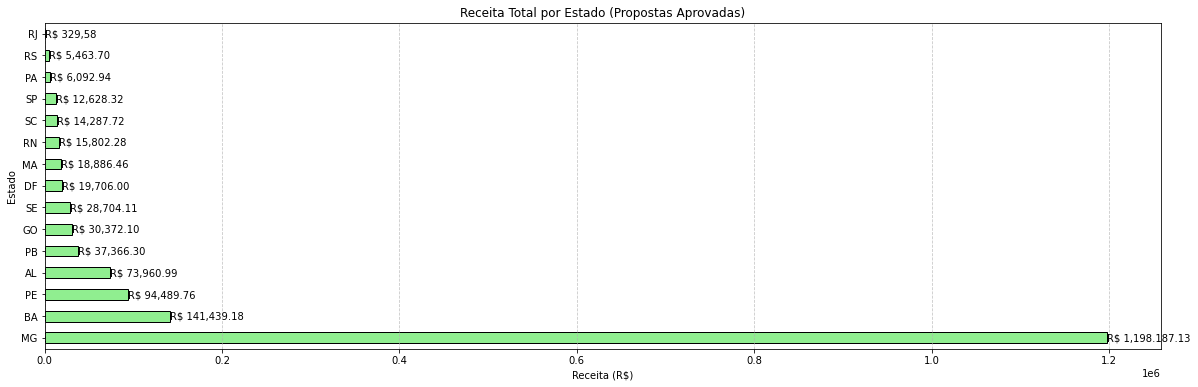

In [85]:
# Ajustando o gráfico para propostas aprovadas

plt.figure(figsize=(20, 6))
receita_por_estado_aprovadas.plot(kind='barh', color='lightgreen', edgecolor='black')
plt.title("Receita Total por Estado (Propostas Aprovadas)")
plt.xlabel("Receita (R$)")
plt.ylabel("Estado")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adicionar os valores no gráfico
for index, value in enumerate(receita_por_estado_aprovadas):
    plt.text(value, index, f"R$ {value:,.2f}".replace(",", ".").replace(".", ",", 1), 
             va='center', ha='left', fontsize=10)

plt.show()

In [86]:
#Filtrando as propostas do estado Rio de Janeiro

propostas_rj = df[df['Estado'] == 'RJ']

In [87]:
# Identificando a data mais antiga na coluna "Data Inclusão"

data_mais_antiga_rj = propostas_rj['Data Inclusão'].min()
print(f"A data mais antiga na coluna 'Data Inclusão' para o estado do Rio de Janeiro é: {data_mais_antiga_rj}")

A data mais antiga na coluna 'Data Inclusão' para o estado do Rio de Janeiro é: 01/04/2022


In [88]:
# Calculando o total de propostas e o total de canceladas no Rio de Janeiro

total_propostas_rj = propostas_rj.shape[0]
propostas_canceladas_rj = propostas_rj[propostas_rj['Fase'] == 'Proposta Cancelada'].shape[0]

In [89]:
# Calculando a taxa de cancelamento

taxa_cancelamento_rj = (propostas_canceladas_rj / total_propostas_rj) * 100
print(f"Taxa de cancelamento para o estado do Rio de Janeiro: {taxa_cancelamento_rj:.2f}%")

Taxa de cancelamento para o estado do Rio de Janeiro: 17.97%


In [90]:
# Verificando a distribuição das fases no Rio de Janeiro

distribuicao_fases_rj = propostas_rj['Fase'].value_counts()
print(f"Distribuição das fases para o estado do Rio de Janeiro:")
print()
display(distribuicao_fases_rj)

Distribuição das fases para o estado do Rio de Janeiro:



Fase
Proposta Aprovada     105
Proposta Cancelada     23
Name: count, dtype: int64

In [91]:
# Comparando a taxa de cancelamento por estados

cancelamento_por_estado = df[df['Fase'] == 'Proposta Cancelada'].groupby('Estado').size()
total_por_estado = df.groupby('Estado').size()

In [92]:
# Taxa de cancelamento por estado

taxa_cancelamento_estados = (cancelamento_por_estado / total_por_estado) * 100

In [93]:
# Comparando Rio de Janeiro com outros estados

print("Taxa de cancelamento por estados:")
print()
display(taxa_cancelamento_estados.sort_values(ascending = False))

Taxa de cancelamento por estados:



Estado
DF    31.222707
RS    30.232558
GO    26.052819
MA    23.353293
SP    19.360731
AL    18.443580
BA    18.097567
RJ    17.968750
PE    17.775306
MG    17.525105
SC    17.229336
PB    15.725414
SE    13.146183
PA    11.836735
RN    11.688312
dtype: float64

In [94]:
# Verificando os serviços solicitados no Rio de Janeiro

distribuicao_servicos_rj = propostas_rj['Serviços'].value_counts()
print("Distribuição de serviços no Rio de Janeiro:")
print()
display(distribuicao_servicos_rj)

Distribuição de serviços no Rio de Janeiro:



Serviços
Novo                                         87
Serviço cancelado pela Esteira Antifraude    23
Novo FGTS                                    13
Refinanciamento                               5
Name: count, dtype: int64

In [95]:
# Valor liberado médio por estado

valor_liberado_por_estado = df.groupby('Estado')['Valor Liberado'].mean().sort_values(ascending = False)
print("Valor liberado médio por estado:")
print()
display(valor_liberado_por_estado)

Valor liberado médio por estado:



Estado
SE    5809.387562
AL    5144.143294
PA    4240.685061
PE    4170.128125
PB    3964.927931
RN    3498.539769
RJ    3372.033828
GO    3250.405817
BA    3221.856465
SP    3066.916932
MA    2953.119212
SC    2614.150885
DF    2383.326517
RS    2267.389302
MG    2184.647976
Name: Valor Liberado, dtype: float64

In [96]:
# Data mais antiga de inclusão por estado

tempo_por_estado = df.groupby('Estado')['Data Inclusão'].min().sort_values()
print("Data mais antiga de inclusão por estado:")
print()
display(tempo_por_estado)

Data mais antiga de inclusão por estado:



Estado
AL    01/02/2022
BA    01/02/2022
DF    01/02/2022
GO    01/02/2022
MA    01/02/2022
MG    01/02/2022
PA    01/02/2022
PB    01/02/2022
PE    01/02/2022
RN    01/02/2022
RS    01/02/2022
SC    01/02/2022
SE    01/02/2022
SP    01/02/2022
RJ    01/04/2022
Name: Data Inclusão, dtype: object

In [97]:
# Criando um ranking

ranking_tempo = tempo_por_estado.rank(method = 'dense', ascending = True).astype(int)
print("\nRanking de estados por tempo na base (1 = mais antigo):")
print()
display(ranking_tempo)


Ranking de estados por tempo na base (1 = mais antigo):



Estado
AL    1
BA    1
DF    1
GO    1
MA    1
MG    1
PA    1
PB    1
PE    1
RN    1
RS    1
SC    1
SE    1
SP    1
RJ    2
Name: Data Inclusão, dtype: int32

In [98]:
# Verificando a receita média por estados

receita_servico_estado = df.groupby(['Estado', 'Serviços'])['Receita'].mean().unstack()
print("Receita média por estado:")
print()
display(receita_servico_estado)

Receita média por estado:



Serviços,Aguardando o fim do Processamento da Proposta,Conta Simples-Saque,Conta Simples-Saque-Seguro,Crédito Pessoal,Crédito Pessoal-Seguro,Nova Conta,Novo,Novo Cartao,Novo Cartao-Saque,Novo Cartao-Saque-Seguro,...,Portabilidade,Refinanciamento,Refinanciamento da Portabilidade,Saque,Saque-Seguro,Seguro,Serviço cancelado pela Esteira Antifraude,Transferência de Conta,Vida Empresta,Vida Empresta Plus
Estado,,,,,,,,,,,,,,,,,,,,,
AL,NaN,NaN,NaN,106.825286,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.296796,1022.287781,95.391765,NaN,250.864780,NaN,NaN,0.00,NaN
BA,NaN,NaN,NaN,152.216212,100.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,34.862129,681.605526,111.177239,NaN,169.273438,NaN,NaN,29.90,NaN
DF,NaN,NaN,NaN,170.875806,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,32.059309,380.945000,14.190000,NaN,2018.300000,NaN,NaN,29.90,NaN
GO,NaN,NaN,NaN,169.833333,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,80.845908,2504.585714,201.086286,NaN,171.739286,NaN,NaN,29.90,39.9
MA,NaN,NaN,NaN,151.128409,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,28.751560,NaN,111.483333,NaN,NaN,NaN,NaN,NaN,NaN
MG,NaN,184.856,630.31,145.080334,153.714062,NaN,NaN,NaN,NaN,NaN,...,NaN,31.847496,269.786809,176.019160,699.257742,261.896370,NaN,NaN,26.91,39.9
PA,NaN,NaN,NaN,273.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,25.545159,201.430612,77.687500,NaN,NaN,NaN,NaN,NaN,NaN
PB,NaN,NaN,NaN,144.182222,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,19.632285,416.231062,105.366563,NaN,300.961463,NaN,NaN,29.90,39.9
PE,NaN,NaN,NaN,119.105000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,35.290953,312.857857,160.382854,NaN,205.520562,NaN,NaN,29.90,39.9


In [99]:
# Filtrando apenas propostas aprovadas

propostas_aprovadas = df[df['Fase'] == 'Proposta Aprovada']

In [100]:
# Contando o volume de propostas aprovadas por serviços e estado

volume_aprovadas = propostas_aprovadas.groupby(['Estado', 'Serviços']).size().unstack()
print("Volume de propostas aprovadas por serviço e estado:")
print()
print(volume_aprovadas)

Volume de propostas aprovadas por serviço e estado:

Serviços  Conta Simples-Saque  Conta Simples-Saque-Seguro  Crédito Pessoal  \
Estado                                                                       
AL                        NaN                         NaN             70.0   
BA                        NaN                         NaN             89.0   
DF                        NaN                         NaN             31.0   
GO                        NaN                         NaN              6.0   
MA                        NaN                         NaN             33.0   
MG                        5.0                         1.0           1746.0   
PA                        NaN                         NaN              5.0   
PB                        NaN                         NaN             45.0   
PE                        NaN                         NaN             94.0   
RJ                        NaN                         NaN              NaN   
RN         

In [101]:
# Volume total de propostas aprovadas por serviço

volume_servicos = df[df['Fase'] == 'Proposta Aprovada']['Serviços'].value_counts()

In [102]:
# Receita total e média por serviços

receita_servicos = df[df['Fase'] == 'Proposta Aprovada'].groupby('Serviços')['Receita'].agg(['sum', 'mean'])
print("Volume total de propostas aprovadas por serviços:")
print()
display(volume_servicos)

Volume total de propostas aprovadas por serviços:



Serviços
Novo FGTS                           36603
Novo                                25785
Nova Conta                           8612
Refinanciamento                      3387
Novo Cartao-Saque                    2547
Crédito Pessoal                      2273
Saque                                1606
Portabilidade                         689
Seguro                                575
Novo Cartao                           505
Transferência de Conta                466
Refinanciamento da Portabilidade      368
Crédito Pessoal-Seguro                 76
Vida Empresta                          57
Saque-Seguro                           31
Vida Empresta Plus                     26
Novo Cartao-Saque-Seguro               10
Conta Simples-Saque                     5
Novo Cartao-Seguro                      3
Conta Simples-Saque-Seguro              1
Name: count, dtype: int64

In [103]:
print("\nReceita total e média por serviço:")
print()
display(receita_servicos)


Receita total e média por serviço:



,sum,mean
Serviços,,
Conta Simples-Saque,924.280000,184.856000
Conta Simples-Saque-Seguro,630.310000,630.310000
Crédito Pessoal,326333.810714,143.569648
Crédito Pessoal-Seguro,11645.700000,153.232895
Nova Conta,0.000000,NaN
Novo,0.000000,NaN
Novo Cartao,0.000000,NaN
Novo Cartao-Saque,0.000000,NaN
Novo Cartao-Saque-Seguro,0.000000,NaN


In [104]:
# Receita média por estado e serviço (apenas propostas aprovadas)

receita_estado_servico = df[df['Fase'] == 'Proposta Aprovada'].pivot_table(
values = 'Receita',
index = 'Estado',
columns = 'Serviços',
aggfunc = 'mean'
)

In [105]:
print("Receita média por estado e serviço (Propostas Aprovadas):")
print()
display(receita_estado_servico)

Receita média por estado e serviço (Propostas Aprovadas):



Serviços,Conta Simples-Saque,Conta Simples-Saque-Seguro,Crédito Pessoal,Crédito Pessoal-Seguro,Novo FGTS,Refinanciamento,Refinanciamento da Portabilidade,Saque,Saque-Seguro,Seguro,Vida Empresta,Vida Empresta Plus
Estado,,,,,,,,,,,,
AL,NaN,NaN,106.825286,NaN,23.054088,25.296796,1022.287781,95.391765,NaN,250.864780,0.00,NaN
BA,NaN,NaN,152.216212,100.333333,19.062805,34.862129,681.605526,111.177239,NaN,169.273438,29.90,NaN
DF,NaN,NaN,170.875806,NaN,21.194362,32.059309,380.945000,14.190000,NaN,2018.300000,29.90,NaN
GO,NaN,NaN,169.833333,NaN,30.015048,80.845908,2504.585714,201.086286,NaN,171.739286,29.90,39.9
MA,NaN,NaN,151.128409,NaN,27.263675,28.751560,NaN,111.483333,NaN,NaN,NaN,NaN
MG,184.856,630.31,145.080334,153.714062,17.566244,31.847496,269.786809,176.019160,699.257742,261.896370,26.91,39.9
PA,NaN,NaN,273.000000,NaN,24.283946,25.545159,201.430612,77.687500,NaN,NaN,NaN,NaN
PB,NaN,NaN,144.182222,NaN,19.272813,19.632285,416.231062,105.366563,NaN,300.961463,29.90,39.9
PE,NaN,NaN,119.105000,NaN,28.838724,35.290953,312.857857,160.382854,NaN,205.520562,29.90,39.9


In [106]:
# Volume por canal

volume_canais = df[df['Fase'] == 'Proposta Aprovada']['Tag Origem'].value_counts()

In [107]:
# Receita média por perfil de cliente

receita_perfil_cliente = df[df['Fase'] == 'Proposta Aprovada'].groupby('Perfil do Cliente')['Receita'].mean()

In [108]:
print("Volume total de propostas aprovadas por canal:")
print()
display(volume_canais)

Volume total de propostas aprovadas por canal:



Tag Origem
Inserido pelo vendedor                                        68736
Origem Não Identificada                                        8527
Site - Página FGTS Banner                                      2843
Site - Chatbot Forneceu dados                                   813
Site - Afiliado Cenarioleads FGTS                               479
                                                              ...  
Site - Pagina Refin Quando Refinanciar                            1
Site - Comparador Aberto - E. Pessoal ViaCerta - FGTS             1
Site - Localizador UN Recife Boa Vista                            1
Site - Comparador Aberto - EP ViaCerta - Não FGTS nem INSS        1
Site - Localizador FRQ Venda Nova                                 1
Name: count, Length: 64, dtype: int64

In [109]:
print("\nReceita média por perfil de cliente:")
print()
display(receita_perfil_cliente)


Receita média por perfil de cliente:



Perfil do Cliente
Aposentado/Pensionista    105.335862
Cliente Normal            140.007862
Funcionário Público       252.873330
Trabalhador Formal         18.430388
Name: Receita, dtype: float64

In [110]:
# Receita total e média por canal (somente propostas aprovadas e excluindo "Inserido pelo vendedor")

receita_por_canal = (
    df[(df['Tag Origem'] != 'Inserido pelo vendedor') & (df['Fase'] == 'Proposta Aprovada')]
    .groupby('Tag Origem')['Receita']
    .agg(['sum', 'mean'])
    .sort_values('sum', ascending=False)
)

# Formatando valores

receita_por_canal['sum'] = receita_por_canal['sum'].round(2)
receita_por_canal['mean'] = receita_por_canal['mean'].round(2)

print("Receita total e média por canal (somente propostas aprovadas, excluindo 'Inserido pelo vendedor'):")
print()
display(receita_por_canal)

Receita total e média por canal (somente propostas aprovadas, excluindo 'Inserido pelo vendedor'):



,sum,mean
Tag Origem,,
Origem Não Identificada,205639.41,43.92
Site - Página FGTS Banner,35395.04,14.67
Site - Chatbot Forneceu dados,7901.82,15.77
Refin Bradesco Lojas - Mercado,7208.96,72.09
Site - Afiliado Cenarioleads FGTS,3972.63,11.93
...,...,...
Site - Localizador FRQ Uberlândia,0.00,NaN
Site - Localizador FRQ Venda Nova,0.00,NaN
Cliente vindo do site,0.00,NaN


In [111]:
# Receita média por perfil de cliente e estado (somente propostas aprovadas)

receita_perfil_estado = (
    df[df['Fase'] == 'Proposta Aprovada']
    .groupby(['Perfil do Cliente', 'Estado'])['Receita']
    .mean()
    .unstack()
    .round(2)
)

print("Receita média por perfil de cliente e estado (somente propostas aprovadas):")
print()
display(receita_perfil_estado)

Receita média por perfil de cliente e estado (somente propostas aprovadas):



Estado,AL,BA,DF,GO,MA,MG,PA,PB,PE,RJ,RN,RS,SC,SE,SP
Perfil do Cliente,,,,,,,,,,,,,,,
Aposentado/Pensionista,182.86,105.60,208.62,262.60,90.42,102.31,116.32,116.77,99.83,39.23,62.98,21.48,52.74,67.74,49.88
Cliente Normal,46.35,238.89,186.41,88.42,151.13,145.86,273.00,125.37,103.31,NaN,209.90,145.77,138.73,114.12,137.36
Funcionário Público,78.12,202.91,NaN,NaN,NaN,291.89,NaN,94.43,188.34,NaN,NaN,NaN,24.69,25.33,NaN
Trabalhador Formal,23.12,19.08,21.19,30.02,27.26,17.56,24.28,19.30,28.40,10.26,21.18,20.09,17.50,20.10,16.32


In [112]:
# Receita média por perfil de cliente e serviço (somente propostas aprovadas)

receita_perfil_servico = (
    df[df['Fase'] == 'Proposta Aprovada']
    .groupby(['Perfil do Cliente', 'Serviços'])['Receita']
    .mean()
    .unstack()
    .round(2)
)

print("Receita média por perfil de cliente e serviço (somente propostas aprovadas):")
print()
display(receita_perfil_servico)

Receita média por perfil de cliente e serviço (somente propostas aprovadas):



Serviços,Conta Simples-Saque,Conta Simples-Saque-Seguro,Crédito Pessoal,Crédito Pessoal-Seguro,Nova Conta,Novo,Novo Cartao,Novo Cartao-Saque,Novo Cartao-Saque-Seguro,Novo Cartao-Seguro,Novo FGTS,Portabilidade,Refinanciamento,Refinanciamento da Portabilidade,Saque,Saque-Seguro,Seguro,Transferência de Conta,Vida Empresta,Vida Empresta Plus
Perfil do Cliente,,,,,,,,,,,,,,,,,,,,
Aposentado/Pensionista,136.35,630.31,122.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.27,306.42,132.77,401.81,259.40,NaN,NaN,NaN
Cliente Normal,256.48,NaN,152.55,153.23,NaN,NaN,NaN,NaN,NaN,NaN,20.24,NaN,26.70,1713.44,313.36,736.50,228.98,NaN,27.28,39.9
Funcionário Público,258.74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.22,400.43,305.05,1277.61,771.28,NaN,NaN,NaN
Trabalhador Formal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.44,NaN,NaN,NaN,NaN,NaN,0.00,NaN,NaN,NaN


In [113]:
# Estatísticas do serviço "Novo FGTS" (somente propostas aprovadas)

novo_fgts_stats = df[(df['Serviços'] == 'Novo FGTS') & (df['Fase'] == 'Proposta Aprovada')].agg({
    'Valor Liberado': ['mean', 'sum', 'min', 'max'],
    'Receita': ['mean', 'sum', 'min', 'max']
}).round(2)

print("Estatísticas do serviço 'Novo FGTS' (somente propostas aprovadas):")
print()
display(novo_fgts_stats)

Estatísticas do serviço 'Novo FGTS' (somente propostas aprovadas):



,Valor Liberado,Receita
mean,1429.03,18.45
sum,52306870.73,675232.76
min,0.00,0.04
max,35109.34,452.91


In [114]:
# Receita por canal para "Novo FGTS" (somente propostas aprovadas)

receita_novo_fgts = (
    df[(df['Serviços'] == 'Novo FGTS') & (df['Fase'] == 'Proposta Aprovada')]
    .groupby('Tag Origem')['Receita']
    .sum()
    .sort_values(ascending=False)
    .round(2)
)

print("Receita por canal para 'Novo FGTS' (somente propostas aprovadas):")
print()
display(receita_novo_fgts)

Receita por canal para 'Novo FGTS' (somente propostas aprovadas):



Tag Origem
Inserido pelo vendedor                                    550376.42
Origem Não Identificada                                    68463.73
Site - Página FGTS Banner                                  35203.04
Site - Chatbot Forneceu dados                               6486.48
Site - Afiliado Cenarioleads FGTS                           3972.63
Site - Página FGTS Contratação digital                      1503.57
Site - Página Empréstimo Pessoal banner                     1401.09
Oferta Obrigatória                                          1230.78
Site - Página FGTS Vantagens                                1165.69
Site - Página Antecipação do FGTS - Chatbot                 1076.72
Site - Afiliado CPTarget FGTS                                955.09
Site - Página FGTS Banner Me Ligue                           716.76
Site - Afiliado credito.vc FGTS                              565.12
Site - Afiliado Compara Online FGTS                          370.67
Site - Página Empréstimo Consignado B

In [115]:
# Filtrando clientes que contratam "Novo FGTS" em propostas aprovadas

clientes_fgts = df[(df['Serviços'] == 'Novo FGTS') & (df['Fase'] == 'Proposta Aprovada')]['ID Cliente'].unique()

In [116]:
# Criando um dataframe com os serviços de clientes que contrataram 'Novo FGTS' (somente propostas aprovadas)

servicos_fgts = df[(df['ID Cliente'].isin(clientes_fgts)) & (df['Fase'] == 'Proposta Aprovada')].copy()

In [117]:
# Ordenando por cliente e data de inclusão

servicos_fgts.sort_values(by = ['ID Cliente', 'Data Inclusão'], inplace = True)

In [118]:
# Identificando se o cliente contratou outros serviços após 'Novo FGTS'

servicos_fgts['Fidelizacao'] = servicos_fgts.groupby('ID Cliente')['Serviços'].transform(
    lambda x: (x != 'Novo FGTS').cumsum()
)

In [119]:
# Filtrando clientes fidelizados (com serviços diferentes de "Novo FGTS" após sua contratação)

clientes_fidelizados = servicos_fgts[servicos_fgts['Fidelizacao'] > 0]

In [120]:
# Filtrando clientes fidelizados (com serviços diferentes de 'Novo FGTS') após a sua contratação

servicos_fidelizados = clientes_fidelizados[clientes_fidelizados['Serviços'] != 'Novo FGTS']

In [121]:
# Contando quantos clientes fidelizados existem

total_fidelizados = clientes_fidelizados['ID Cliente'].nunique()

In [122]:
# Exibindo o volume de serviços contratados pelos clientes fidelizados

volume_servicos_fidelizados = servicos_fidelizados['Serviços'].value_counts()

In [123]:
# Exibindo os resultados

print(f"Total de clientes que contrataram 'Novo FGTS' (aprovados): {len(clientes_fgts)}")
print()
print(f"Total de clientes fidelizados (contrataram outros serviços após 'Novo FGTS'): {total_fidelizados}")
print()
print("\nVolume de serviços contratados por clientes fidelizados:")
print()
print(volume_servicos_fidelizados)

Total de clientes que contrataram 'Novo FGTS' (aprovados): 33668

Total de clientes fidelizados (contrataram outros serviços após 'Novo FGTS'): 1802


Volume de serviços contratados por clientes fidelizados:

Serviços
Nova Conta                1584
Novo                       158
Crédito Pessoal            101
Seguro                      20
Crédito Pessoal-Seguro      17
Novo Cartao-Saque           10
Refinanciamento              9
Vida Empresta                7
Saque                        7
Vida Empresta Plus           3
Portabilidade                2
Novo Cartao                  2
Transferência de Conta       1
Name: count, dtype: int64


In [124]:
# Propostas inconsistentes com base nas regras de receita

servicos_sem_receita = [
    "Aguardando o fim do Processamento da Proposta",
    "Nova Conta",
    "Novo",
    "Novo Cartao",
    "Novo Cartao-Saque",
    "Novo Cartao-Saque-Seguro",
    "Novo Cartao-Seguro",
    "Portabilidade",
    "Serviço cancelado pela Esteira Antifraude",
    "Transferência de Conta"
]

# Filtrando serviços que devem gerar receita

servicos_com_receita = df[~df['Serviços'].isin(servicos_sem_receita)]['Serviços'].unique()

# Propostas inconsistentes (Valor Liberado > 0 e Receita nula)

inconsistentes_receita = df[(df['Serviços'].isin(servicos_com_receita)) &
                            (df['Valor Liberado'] > 0) & 
                            (df['Receita'].isnull())]

# Propostas inconsistentes (Receita > 0 e Valor Liberado nulo)

inconsistentes_valor = df[(df['Serviços'].isin(servicos_com_receita)) &
                          (df['Receita'] > 0) & 
                          (df['Valor Liberado'].isnull())]

In [125]:
# Exibindo resultados

print("Propostas inconsistentes (Valor Liberado > 0 e Receita nula):")
print()
print(inconsistentes_receita)
print()
print("\nPropostas inconsistentes (Receita > 0 e Valor Liberado nulo):")
print()
print(inconsistentes_valor)

Propostas inconsistentes (Valor Liberado > 0 e Receita nula):

Empty DataFrame
Columns: [ID Proposta, ID Cliente, Fase, Empresa, Situação, Canal, Unidade, Regional, Instituição, Convênio, Serviços, Valor Liberado, Receita, Tabela, Tag Origem, Nome do Segmento, Data Inclusão, Data Digitada, Data Aprovada, Data Paga Cliente, Data Cancelada, Digital, Hora da Inclusão, Hora da Digitada, Hora da Aprovada, Hora da Paga, Hora da Cancelada, Condição, Estado, Perfil do Cliente, Percentual Receita, Flag Inconsistencia]
Index: []

[0 rows x 32 columns]


Propostas inconsistentes (Receita > 0 e Valor Liberado nulo):

Empty DataFrame
Columns: [ID Proposta, ID Cliente, Fase, Empresa, Situação, Canal, Unidade, Regional, Instituição, Convênio, Serviços, Valor Liberado, Receita, Tabela, Tag Origem, Nome do Segmento, Data Inclusão, Data Digitada, Data Aprovada, Data Paga Cliente, Data Cancelada, Digital, Hora da Inclusão, Hora da Digitada, Hora da Aprovada, Hora da Paga, Hora da Cancelada, Condição, Est

In [126]:
# Propostas canceladas pela esteira antifraude

antifraude_cancelamentos = df[df['Serviços'] == 'Serviço cancelado pela Esteira Antifraude']

In [127]:
# Volume de cancelamentos por cliente e canal

cancelamentos_por_cliente = antifraude_cancelamentos['ID Cliente'].value_counts()
cancelamentos_por_canal = antifraude_cancelamentos['Tag Origem'].value_counts()

In [128]:
# Exibindo resultados

print("Cancelamentos pela esteira antifraude por cliente:")
print()
print(cancelamentos_por_cliente.head())
print()
print("\nCancelamentos pela esteira antifraude por canal:")
print()
print(cancelamentos_por_canal.head())

Cancelamentos pela esteira antifraude por cliente:

ID Cliente
4787418    50
5149459    25
3153797    23
4788187    19
5993714    11
Name: count, dtype: int64


Cancelamentos pela esteira antifraude por canal:

Tag Origem
Inserido pelo vendedor                         13890
Origem Não Identificada                         2158
Site - Página FGTS Banner                       1250
Site - Chatbot Forneceu dados                    202
Site - Página Antecipação do FGTS - Chatbot      104
Name: count, dtype: int64


In [129]:
# Clientes com mais de 3 solicitações reprovadas

reprovados_frequentes = df[df['Fase'] == 'Proposta Reprovada']['ID Cliente'].value_counts()
reprovados_frequentes = reprovados_frequentes[reprovados_frequentes > 3]

print("Clientes com mais de 3 propostas reprovadas:")
print()
print(reprovados_frequentes)

Clientes com mais de 3 propostas reprovadas:

Series([], Name: count, dtype: int64)


In [130]:
# Taxa de rejeição por serviço

rejeicao_por_servico = df[df['Fase'] == 'Proposta Reprovada']['Serviços'].value_counts()

In [131]:
# Taxa de rejeição por canal

rejeicao_por_canal = df[df['Fase'] == 'Proposta Reprovada']['Tag Origem'].value_counts()

In [132]:
# Exibindo resultados

print("Taxa de rejeição por serviço:")
print()
print(rejeicao_por_servico)
print()
print("\nTaxa de rejeição por canal:")
print()
print(rejeicao_por_canal)

Taxa de rejeição por serviço:

Series([], Name: count, dtype: int64)


Taxa de rejeição por canal:

Series([], Name: count, dtype: int64)


In [133]:
# Detectando possíveis fraudes baseadas na "Situação"

possiveis_fraudes = df[
    (df['Situação'] == 'Proposta em análise pela Esteira Antifraude') &
    (df['Fase'] == 'Proposta Cancelada')
]

In [134]:
# Propostas com múltiplas alterações na coluna "Situação"

alteracoes_situacao = df.groupby('ID Proposta')['Situação'].nunique()
alteracoes_frequentes = alteracoes_situacao[alteracoes_situacao > 2]

In [135]:
# Exibindo resultados

print("Propostas canceladas em análise pela Esteira Antifraude:")
print()
print(possiveis_fraudes)
print()
print("\nPropostas com múltiplas alterações na coluna 'Situação':")
print()
print(alteracoes_frequentes)

Propostas canceladas em análise pela Esteira Antifraude:

Empty DataFrame
Columns: [ID Proposta, ID Cliente, Fase, Empresa, Situação, Canal, Unidade, Regional, Instituição, Convênio, Serviços, Valor Liberado, Receita, Tabela, Tag Origem, Nome do Segmento, Data Inclusão, Data Digitada, Data Aprovada, Data Paga Cliente, Data Cancelada, Digital, Hora da Inclusão, Hora da Digitada, Hora da Aprovada, Hora da Paga, Hora da Cancelada, Condição, Estado, Perfil do Cliente, Percentual Receita, Flag Inconsistencia]
Index: []

[0 rows x 32 columns]


Propostas com múltiplas alterações na coluna 'Situação':

Series([], Name: Situação, dtype: int64)


In [136]:
# Filtrando os clientes com maior número de cancelamentos

clientes_antifraude = [4787418, 5149459, 3153797, 4788187, 5993714]

In [137]:
# Criando um dataFrame com as atividades desses clientes

atividades_clientes = df[df['ID Cliente'].isin(clientes_antifraude)]

In [138]:
# Analisando estados das propostas canceladas

estados_cancelados = atividades_clientes[atividades_clientes['Situação'] == 'Proposta Cancelada pelo Banco ou pelo Cliente']['Estado'].value_counts()

In [139]:
# Analisando canais das propostas canceladas

canais_cancelados = atividades_clientes[atividades_clientes['Situação'] == 'Proposta Cancelada pelo Banco ou pelo Cliente']['Tag Origem'].value_counts()

In [140]:
# Analisando datas das propostas canceladas

datas_canceladas = atividades_clientes[atividades_clientes['Situação'] == 'Proposta Cancelada pelo Banco ou pelo Cliente']['Data Inclusão'].value_counts()

In [141]:
# Exibir resultados

print("Estados das propostas canceladas por esses clientes:")
print()
print(estados_cancelados)
print()
print("\nCanais das propostas canceladas por esses clientes:")
print()
print(canais_cancelados)
print()
print("\nDatas das propostas canceladas por esses clientes:")
print()
print(datas_canceladas)

Estados das propostas canceladas por esses clientes:

Estado
MG    106
AL     19
PE      3
Name: count, dtype: int64


Canais das propostas canceladas por esses clientes:

Tag Origem
Inserido pelo vendedor               74
Site - Página FGTS Banner            37
Origem Não Identificada               9
Site - Afiliado credito.vc FGTS       7
Botão Nova Proposta - Tela Vendas     1
Name: count, dtype: int64


Datas das propostas canceladas por esses clientes:

Data Inclusão
21/01/2022    12
24/01/2022    10
17/03/2022     8
25/02/2022     8
18/03/2022     7
30/03/2022     7
24/03/2022     6
20/01/2022     5
23/03/2022     5
29/03/2022     4
25/01/2022     4
21/03/2022     3
26/01/2022     3
02/02/2022     3
25/03/2022     3
31/03/2022     3
07/04/2022     3
13/04/2022     3
22/03/2022     2
07/03/2022     2
10/03/2022     2
11/04/2022     2
03/02/2022     2
06/04/2022     1
04/04/2022     1
01/04/2022     1
26/04/2022     1
19/04/2022     1
12/04/2022     1
18/04/2022     1
08/04/2022   

In [142]:
# Analisando impacto na receita para propostas canceladas desses clientes

impacto_receita = atividades_clientes[atividades_clientes['Situação'] == 'Proposta Cancelada pelo Banco ou pelo Cliente'][['Valor Liberado', 'Receita']].sum()

print("\nImpacto na Receita de Propostas Canceladas por esses Clientes:")
print()
print(impacto_receita)


Impacto na Receita de Propostas Canceladas por esses Clientes:

Valor Liberado    815409.65
Receita                0.00
dtype: float64


In [143]:
# Selecionar clientes suspeitos das análises anteriores

clientes_suspeitos = df[df['ID Cliente'].isin([4787418, 5149459, 3153797, 4788187, 5993714])]

In [144]:
# Cancelamentos por vendedor

cancelamentos_vendedor = clientes_suspeitos['Canal'].value_counts()

print("Cancelamentos por vendedor:")
print()
print(cancelamentos_vendedor)

Cancelamentos por vendedor:

Canal
Loja Própria     70
E-commerce       44
Televendas       37
Loja Franquia    15
Name: count, dtype: int64


In [145]:
# Cancelamentos por data e canal

cancelamentos_data_canal = clientes_suspeitos.groupby(['Data Inclusão', 'Canal']).size()

print("Cancelamentos por data e canal:")
print()
print(cancelamentos_data_canal)

Cancelamentos por data e canal:

Data Inclusão  Canal       
01/04/2022     E-commerce      1
               Televendas      1
02/02/2022     Loja Própria    3
03/02/2022     Loja Própria    2
03/12/2021     Loja Própria    1
                              ..
30/03/2022     Loja Própria    1
               Televendas      1
30/04/2022     Loja Própria    1
31/03/2022     E-commerce      2
               Loja Própria    1
Length: 77, dtype: int64


In [146]:
# Cancelamentos por perfil de cliente

cancelamentos_perfil = clientes_suspeitos['Perfil do Cliente'].value_counts()

print("Cancelamentos por perfil de cliente:")
print()
print(cancelamentos_perfil)

Cancelamentos por perfil de cliente:

Perfil do Cliente
Cliente Normal            163
Aposentado/Pensionista      2
Trabalhador Formal          1
Name: count, dtype: int64


In [147]:
# Verificar duplicação de clientes pelo ID

duplicados = clientes_suspeitos.duplicated(subset=['ID Cliente', 'Serviços', 'Data Inclusão'], keep=False)

print("Dados duplicados entre os clientes suspeitos:")
print()
print(clientes_suspeitos[duplicados])

Dados duplicados entre os clientes suspeitos:

       ID Proposta  ID Cliente                       Fase   Empresa  \
15893      6896443     5149459         Proposta Cancelada  Empresta   
15898      6896489     4788187         Proposta Cancelada  Empresta   
15900      6896528     5149459         Proposta Cancelada  Empresta   
15902      6896538     4788187         Proposta Cancelada  Empresta   
15904      6896553     5149459         Proposta Cancelada  Empresta   
...            ...         ...                        ...       ...   
95604      7656677     4788187  Proposta em Processamento  Empresta   
95607      7656790     4788187  Proposta em Processamento  Empresta   
95608      7656793     4788187  Proposta em Processamento  Empresta   
95613      7656800     4788187  Proposta em Processamento  Empresta   
95614      7656802     4788187  Proposta em Processamento  Empresta   

                                            Situação          Canal  \
15893  Proposta Cancelada pel

In [148]:
# Padrões de serviços entre os clientes suspeitos

padroes_servicos = clientes_suspeitos.groupby('Serviços').size()

print("Padrões de serviços entre os clientes suspeitos:")
print()
print(padroes_servicos)

Padrões de serviços entre os clientes suspeitos:

Serviços
Aguardando o fim do Processamento da Proposta     35
Novo                                               2
Novo FGTS                                          1
Serviço cancelado pela Esteira Antifraude        128
dtype: int64


In [149]:
# Cancelamentos por estado

cancelamentos_por_estado = clientes_suspeitos['Estado'].value_counts()

In [150]:
# Cancelamentos por canal

cancelamentos_por_canal = clientes_suspeitos['Canal'].value_counts()

In [151]:
# Exibindo resultados

print("Cancelamentos por estado:")
print()
print(cancelamentos_por_estado)
print("\nCancelamentos por canal:")
print()
print(cancelamentos_por_canal)

Cancelamentos por estado:

Estado
MG    134
AL     21
RN      8
PE      3
Name: count, dtype: int64

Cancelamentos por canal:

Canal
Loja Própria     70
E-commerce       44
Televendas       37
Loja Franquia    15
Name: count, dtype: int64


In [152]:
# Calculando o impacto financeiro evitado

impacto_financeiro = clientes_suspeitos['Valor Liberado'].sum()
print(f"Impacto financeiro evitado pela Esteira Antifraude: R$ {impacto_financeiro:,.2f}")

Impacto financeiro evitado pela Esteira Antifraude: R$ 858,648.68


In [153]:
# Datas mais frequentes de cancelamento

datas_frequentes_cancelamento = clientes_suspeitos['Data Inclusão'].value_counts()

print("Datas mais frequentes de cancelamento:")
print()
print(datas_frequentes_cancelamento.head(10))

Datas mais frequentes de cancelamento:

Data Inclusão
21/01/2022    13
19/04/2022    10
24/01/2022    10
25/02/2022     8
30/03/2022     8
18/04/2022     8
17/03/2022     8
18/03/2022     7
24/03/2022     7
08/04/2022     6
Name: count, dtype: int64


In [154]:
# Serviços e canais por cliente com múltiplas tentativas

tentativas_por_cliente = clientes_suspeitos.groupby('ID Cliente')[['Serviços', 'Canal']].agg(list)

print("Serviços e canais por cliente com múltiplas tentativas:")
print()
print(tentativas_por_cliente)

Serviços e canais por cliente com múltiplas tentativas:

                                                     Serviços  \
ID Cliente                                                      
3153797     [Serviço cancelado pela Esteira Antifraude, Se...   
4787418     [Serviço cancelado pela Esteira Antifraude, Se...   
4788187     [Serviço cancelado pela Esteira Antifraude, Se...   
5149459     [Aguardando o fim do Processamento da Proposta...   
5993714     [Serviço cancelado pela Esteira Antifraude, Se...   

                                                        Canal  
ID Cliente                                                     
3153797     [Loja Própria, Loja Própria, Loja Própria, Loj...  
4787418     [Loja Franquia, Loja Própria, Loja Própria, Te...  
4788187     [Loja Própria, Loja Própria, Loja Própria, Tel...  
5149459     [Televendas, Loja Própria, Loja Própria, Loja ...  
5993714     [Loja Própria, Loja Própria, Loja Própria, Loj...  


In [155]:
# Salvando os dados tratados e as análises em um arquivo Excel

output_file = "Analise_Empresta_Bem_Melhor.xlsx"

with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    
    # Base de dados tratada
    
    df.to_excel(writer, sheet_name='Base Tratada', index=False)

    # Receita por estado
    
    receita_por_estado_formatada_aprovadas.to_excel(writer, sheet_name='Receita por Estado')

    # Taxa de cancelamento por estado
    
    taxa_cancelamento_estados.to_excel(writer, sheet_name='Taxa de Cancelamento')

    # Fidelização de clientes
    
    volume_servicos_fidelizados.to_excel(writer, sheet_name='Fidelização de Clientes')

    # Serviços sem receita
    
    pd.DataFrame(servicos_sem_receita, columns=['Serviços Sem Receita']).to_excel(writer, sheet_name='Serviços Sem Receita', index=False)

    # Outliers identificados
    
    outliers.to_excel(writer, sheet_name='Outliers Identificados')

print(f"Arquivo '{output_file}' gerado com sucesso!")

Arquivo 'Analise_Empresta_Bem_Melhor.xlsx' gerado com sucesso!
